In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bank_data = 'https://github.com/JakeOh/202205_itw_bd34/raw/main/datasets/banklist.csv'

In [16]:
bank = pd.read_csv(bank_data, parse_dates=['Closing Date','Updated Date'])
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [17]:
bank.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


In [ ]:
# banklist['Closing Date'] = pd.to_datetime(banklist['Closing Date'])
# banklist['Updated Date'] = pd.to_datetime(banklist['Updated Date'])
# 15-Dec-17 을 2017-12-15로 바꿔주는 코드

In [5]:
# 'Closing Date' 컬럼을 인덱스로 변환 -> resample을 하기 위해서.
bank_closing= bank.set_index('Closing Date')
bank_closing

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2017-12-15,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-20
2017-10-13,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-20
2017-05-26,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-07-26
2017-05-05,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-07-26
2017-04-28,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-12-05
...,...,...,...,...,...,...
2001-07-27,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2014-08-19
2001-05-03,Malta National Bank,Malta,OH,6629,North Valley Bank,2002-11-18
2001-02-02,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2003-02-18


In [6]:
bank_y = bank_closing.resample('Y')['Bank Name'].count()
bank_y

Closing Date
2000-12-31      2
2001-12-31      4
2002-12-31     11
2003-12-31      3
2004-12-31      4
2005-12-31      0
2006-12-31      0
2007-12-31      3
2008-12-31     25
2009-12-31    140
2010-12-31    157
2011-12-31     92
2012-12-31     51
2013-12-31     24
2014-12-31     18
2015-12-31      8
2016-12-31      5
2017-12-31      8
Freq: A-DEC, Name: Bank Name, dtype: int64

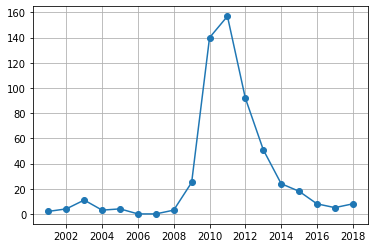

In [7]:
plt.plot(bank_y, marker='o')
plt.grid()
plt.show()

In [8]:
bank_q= bank_closing.resample('Q')['Bank Name'].count()
bank_q

Closing Date
2000-12-31    2
2001-03-31    1
2001-06-30    1
2001-09-30    2
2001-12-31    0
             ..
2016-12-31    0
2017-03-31    3
2017-06-30    3
2017-09-30    0
2017-12-31    2
Freq: Q-DEC, Name: Bank Name, Length: 69, dtype: int64

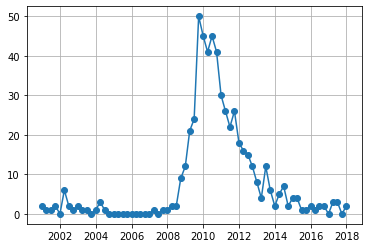

In [9]:
plt.plot(bank_q, marker='o')
plt.grid()
plt.show()

In [10]:
bank_w= bank_closing.resample('W')['Bank Name'].count()
bank_w

Closing Date
2000-10-15    1
2000-10-22    0
2000-10-29    0
2000-11-05    0
2000-11-12    0
             ..
2017-11-19    0
2017-11-26    0
2017-12-03    0
2017-12-10    0
2017-12-17    1
Freq: W-SUN, Name: Bank Name, Length: 897, dtype: int64

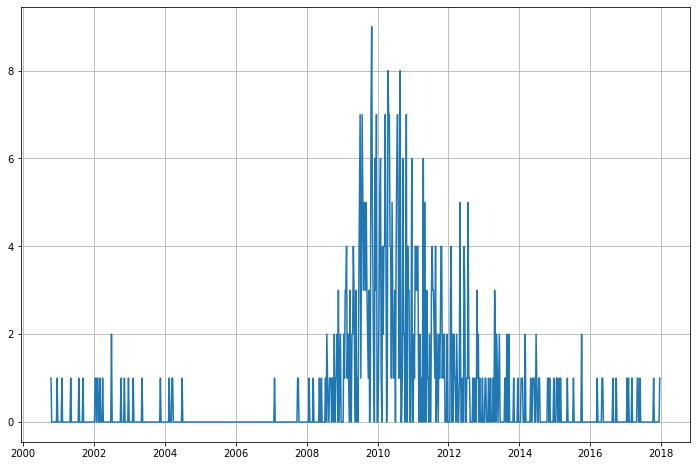

In [11]:
plt.figure(figsize=(12,8))
plt.plot(bank_w)
plt.grid()
plt.show()

# Movielens 데이터 셋

In [18]:
# 파일이 저장된 github 경로
data = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'
col_names=['user_id','movie_id','rating','ts']

In [19]:
ratings = pd.read_csv(data,sep='::', engine='python', names=col_names)

In [20]:
ratings.head()

,user_id,movie_id,rating,ts
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [27]:
#timestamp(정수)를 datetime으로 변환한 파생변수 (컬럼)
# unit 파라미터 : 초(s), milli-second(ms), micro-second(us), nano-second(ns)
ratings['dt'] = pd.to_datetime(ratings['ts'], unit='s')
ratings.head()

,user_id,movie_id,rating,ts,dt
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [28]:
ratings['dt'].agg(['min','max'])

min   2000-04-25 23:05:32
max   2003-02-28 17:49:50
Name: dt, dtype: datetime64[ns]

In [30]:
ratings.set_index('dt').resample('Y').size()
#size() 원소개수반환

dt
2000-12-31    904757
2001-12-31     68058
2002-12-31     24046
2003-12-31      3348
Freq: A-DEC, dtype: int64